# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\yura\AppData\Local\Temp\ipykernel_18108\3107362156.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


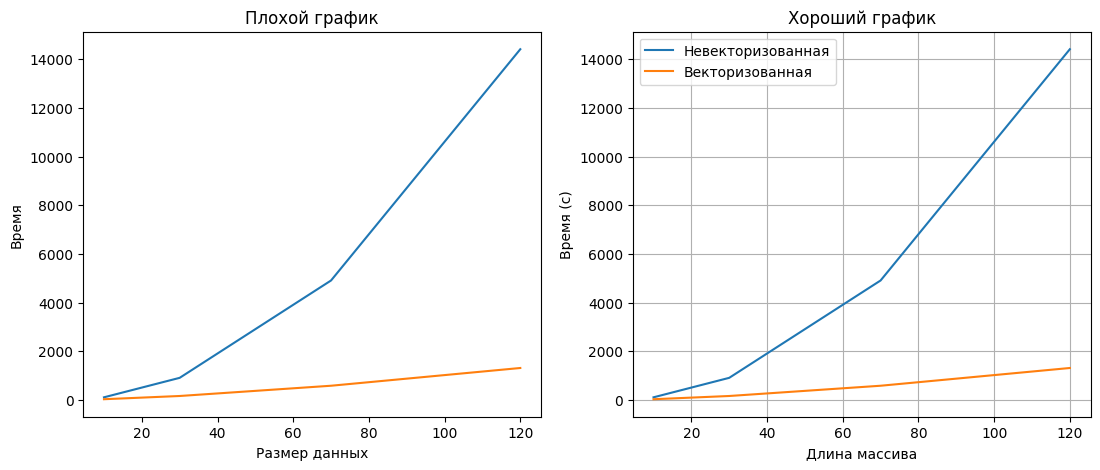

In [48]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [49]:
def prod_non_zero_diag(x):
    n,m = map(int(input().split()))
    a = [[0 for j in range(n)] for i in range(m)]
    x = 1
    flag = 1
    for i in range(n):
        if(a[i][i] != 0):
            flag = 0
            x *= a[i][i]
    if(flag == 1):
        print(0)
    else:
        print(x)
    pass


In [50]:
def prod_non_zero_diag(x):
    n,m = map(int(input().split()))
    a = [[0 for j in range(n)] for i in range(m)]
    arr = np.array(a)
    element = np.diag(arr)
    non_zero_d = element[element != 0]
    if len(non_zero_d) > 0:
        return np.prod(non_zero_d)
    else:
        return 0
    pass


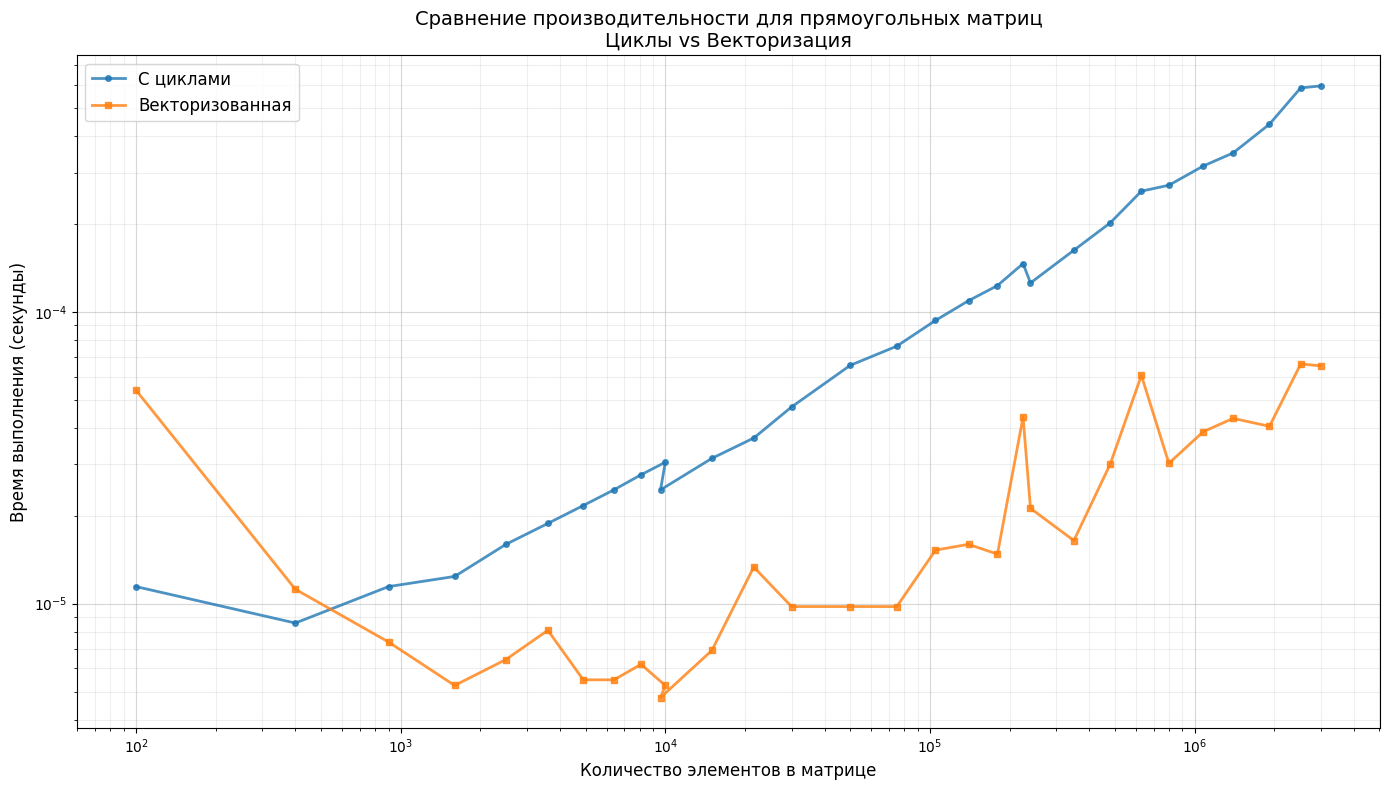

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import time

def prod_non_zero_diag_v1(x):
    n, m = x.shape
    result = 1
    flag = 1
    for i in range(min(n, m)):
        if x[i][i] != 0:
            flag = 0
            result *= x[i][i]
    if flag == 1:
        return 0
    else:
        return result

def prod_non_zero_diag_v2(x):
    diag_elements = np.diag(x)
    non_zero_diag = diag_elements[diag_elements != 0]
    if len(non_zero_diag) > 0:
        return np.prod(non_zero_diag)
    else:
        return 0

def measure_time(func, matrix):
    start_time = time.time()
    result = func(matrix)
    end_time = time.time()
    return end_time - start_time, result

sizes = [
    (10, 10), (20, 20), (30, 30), (40, 40), (50, 50),
    (60, 60), (70, 70), (80, 80), (90, 90), (100, 100),
    (120, 80), (150, 100), (180, 120), (200, 150), (250, 200),
    (300, 250), (350, 300), (400, 350), (450, 400), (500, 450),
    (600, 400), (700, 500), (800, 600), (900, 700), (1000, 800),
    (1200, 900), (1400, 1000), (1600, 1200), (1800, 1400), (2000, 1500)
]

times_v1 = []
times_v2 = []
for n, m in sizes:

    matrix = np.random.rand(n, m)
    # добавляем нули
    min_dim = min(n, m)
    for i in range(min_dim // 10): 
        matrix[i, i] = 0
    
    time_v1, result_v1 = measure_time(prod_non_zero_diag_v1, matrix)
    time_v2, result_v2 = measure_time(prod_non_zero_diag_v2, matrix)
    times_v1.append(time_v1)
    times_v2.append(time_v2)


# Строим график
plt.figure(figsize=(14, 8))

# ось x 
total_elements = [n * m for n, m in sizes]

plt.plot(total_elements, times_v1, 'o-', label='С циклами', linewidth=2, markersize=4, alpha=0.8)
plt.plot(total_elements, times_v2, 's-', label='Векторизованная', linewidth=2, markersize=4, alpha=0.8)
plt.xlabel('Количество элементов в матрице', fontsize=12)
plt.ylabel('Время выполнения (секунды)', fontsize=12)
plt.title('Сравнение производительности для прямоугольных матриц\nЦиклы vs Векторизация', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3) # фон
plt.yscale('log')
plt.xscale('log')

# Добавляем сетку
plt.minorticks_on()
plt.grid(True, which='major', alpha=0.5)
plt.grid(True, which='minor', alpha=0.2)

plt.tight_layout()
plt.show()




 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


In [52]:
def are_multisets_equal_cyclic(x, y):
    x =  list(map(int, input().split()))
    y =  list(map(int, input().split()))
    m1 = map()
    m2 = map()
    flag = 0
    for el in x:
        m1[el] += 1
    for el in y:
        m2[el] += 1
    for el in y:
        if(m1[el] !=m2[el]):
            flag = 1
    for el in x:
        if(m1[el] !=m2[el]):
            flag = 1
    if(flag == 1):
        print("False")
    else:
        print("True")

In [53]:
def are_multisets_equal_vectorized(x, y):
    x_arr = np.array(x)
    y_arr = np.array(y)
    if x_arr.size != y_arr.size:
        return False
    return np.array_equal(np.sort(x_arr), np.sort(y_arr))


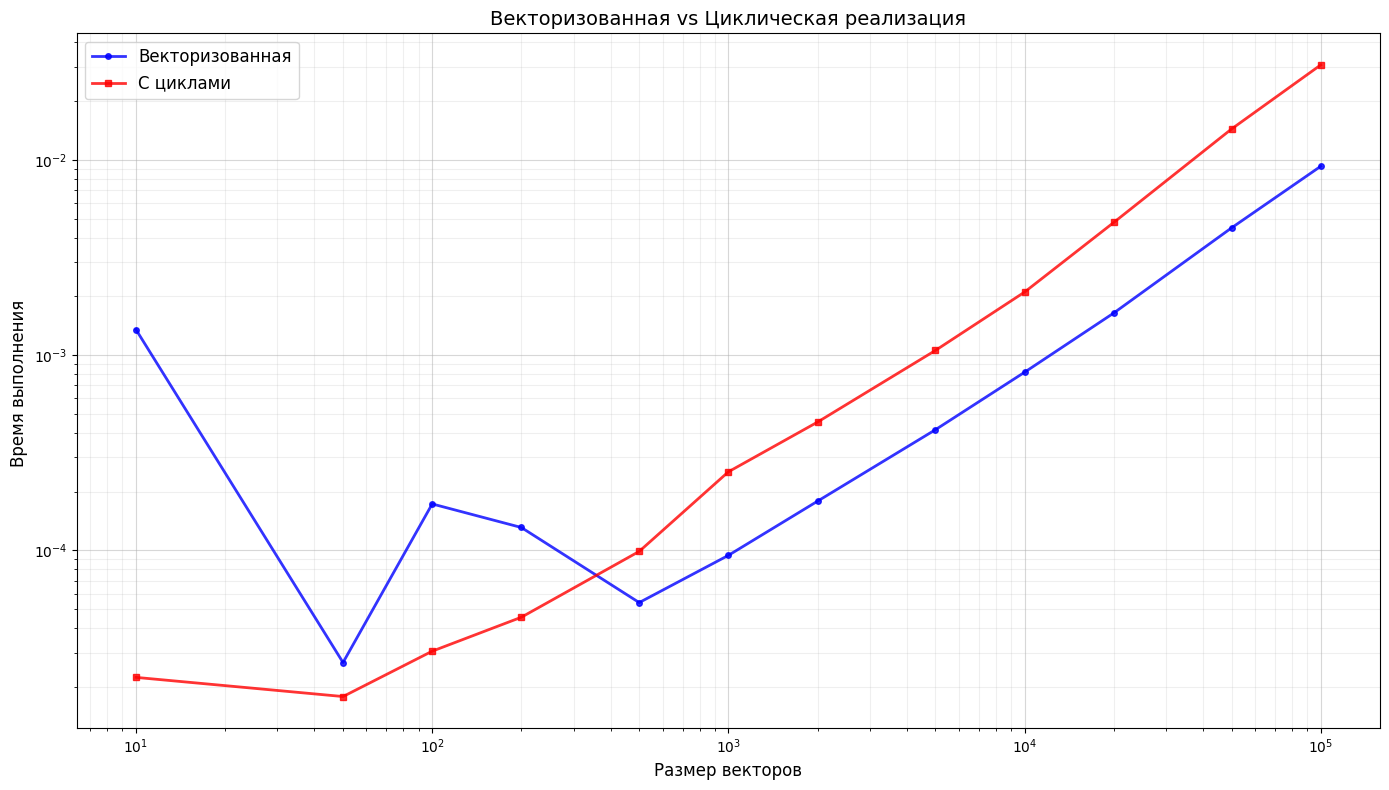

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict


def are_multisets_equal_vectorized(x, y):
    x_arr = np.array(x)
    y_arr = np.array(y)
    if x_arr.size != y_arr.size:
        return False
    return np.array_equal(np.sort(x_arr), np.sort(y_arr))


def are_multisets_equal_cyclic(x, y):
    if len(x) != len(y):
        return False
    
    m1 = defaultdict(int)
    m2 = defaultdict(int)
    
    for el in x:
        m1[el] += 1
    for el in y:
        m2[el] += 1
    
    for el in set(x + y):
        if m1[el] != m2[el]:
            return False
    return True


def measure_time(func, x, y):
    start_time = time.time()
    result = func(x, y)
    end_time = time.time()
    return end_time - start_time, result

sizes = [10, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
times_vectorized = []
times_cyclic = []


for size in sizes:

    x = np.random.randint(0, size//2, size).tolist()
    y = x.copy()
    np.random.shuffle(y)  
    
    time_vec, result_vec = measure_time(are_multisets_equal_vectorized, x, y)
    time_cyc, result_cyc = measure_time(are_multisets_equal_cyclic, x, y)
    
    times_vectorized.append(time_vec)
    times_cyclic.append(time_cyc)
    



plt.figure(figsize=(14, 8))

plt.plot(sizes, times_vectorized, 'o-', label='Векторизованная', linewidth=2, markersize=4, alpha=0.8, color='blue')
plt.plot(sizes, times_cyclic, 's-', label='С циклами', linewidth=2, markersize=4, alpha=0.8, color='red')

plt.xlabel('Размер векторов', fontsize=12)
plt.ylabel('Время выполнения ', fontsize=12)
plt.title('Векторизованная vs Циклическая реализация', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.xscale('log')

plt.minorticks_on()
plt.grid(True, which='major', alpha=0.5)
plt.grid(True, which='minor', alpha=0.2)

plt.tight_layout()
plt.show()



* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

In [55]:
def max_after_zero(x):
    n = x.size()
    mx = 0
    flag = 0
    for i in range(1,n):
        if (x[i - 1] == 0 and flag == 0):
            mx = x[i]
        if(x[i - 1] == 0 and mx < x[i]):
            mx = x[i]
    return mx


In [56]:
def max_after_zero_vector(x):
    mask = np.append([False], x[:-1] == 0)
    elements = x[mask]
    if elements.size > 0:
        max_element = np.max(elements)
    else:
        max_element = None 
    return max_element

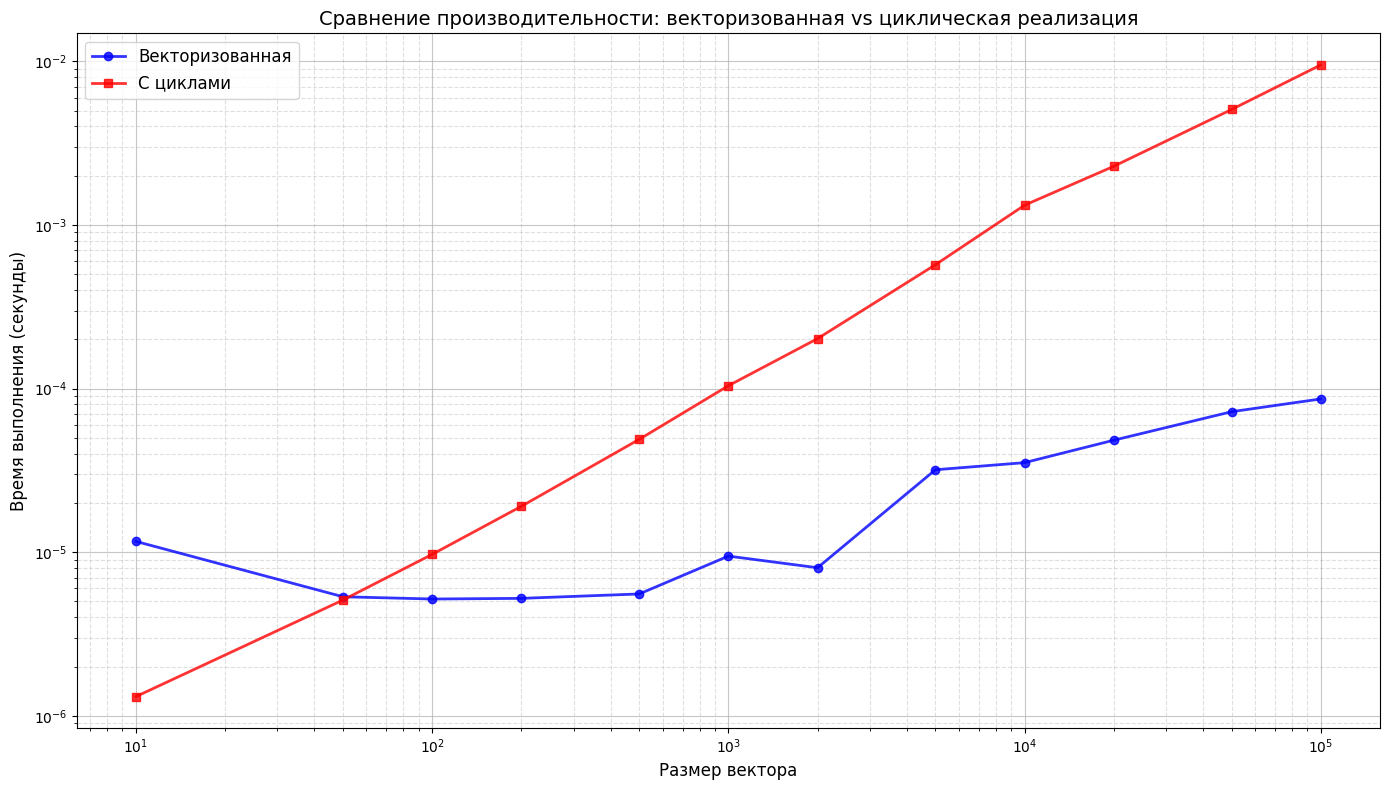

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import time

def max_after_zero(x):
    n = x.size  
    mx = None   
    for i in range(1, n):
        if x[i - 1] == 0:
            if mx is None:  
                mx = x[i]
            elif x[i] > mx:  
                mx = x[i]
    return mx

def max_after_zero_vector(x):
    mask = np.append([False], x[:-1] == 0)
    elements = x[mask]
    if elements.size > 0:
        max_element = np.max(elements)
    else:
        max_element = None
    return max_element  


def measure_time(func, x, repetitions=10):
    start_time = time.time()
    for _ in range(repetitions):
        result = func(x)
    end_time = time.time()
    return (end_time - start_time) / repetitions, result

sizes = [10, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
times_vectorized = []
times_cyclic = []


for size in sizes:
    x = np.random.randint(-size//2, size//2, size)
    zero_indices = np.random.choice(size, size=min(size//10, 1000), replace=False)
    x[zero_indices] = 0
    time_vec, result_vec = measure_time(max_after_zero_vector, x)
    times_vectorized.append(time_vec)
    time_cyc, result_cyc = measure_time(max_after_zero, x)
    times_cyclic.append(time_cyc)


plt.figure(figsize=(14, 8))

plt.plot(sizes, times_vectorized, 'o-', label='Векторизованная', linewidth=2, markersize=6, alpha=0.8, color='blue')
plt.plot(sizes, times_cyclic, 's-', label='С циклами', linewidth=2, markersize=6, alpha=0.8, color='red')

plt.xlabel('Размер вектора', fontsize=12)
plt.ylabel('Время выполнения (секунды)', fontsize=12)
plt.title('Сравнение производительности: векторизованная vs циклическая реализация', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.xscale('log')

# Добавляем сетку
plt.minorticks_on()
plt.grid(True, which='major', linestyle='-', alpha=0.7)
plt.grid(True, which='minor', linestyle='--', alpha=0.4)


plt.tight_layout()
plt.show()





 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


In [58]:
def convert_image_vectorized(image, weight):
    return np.sum(image * weight, axis=2)


In [59]:
def convert_image_cyclic(image, weights):
    height, width, num_channels = image.shape
    result = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            for k in range(num_channels):
                result[i, j] += image[i, j, k] * weights[k]
    return result

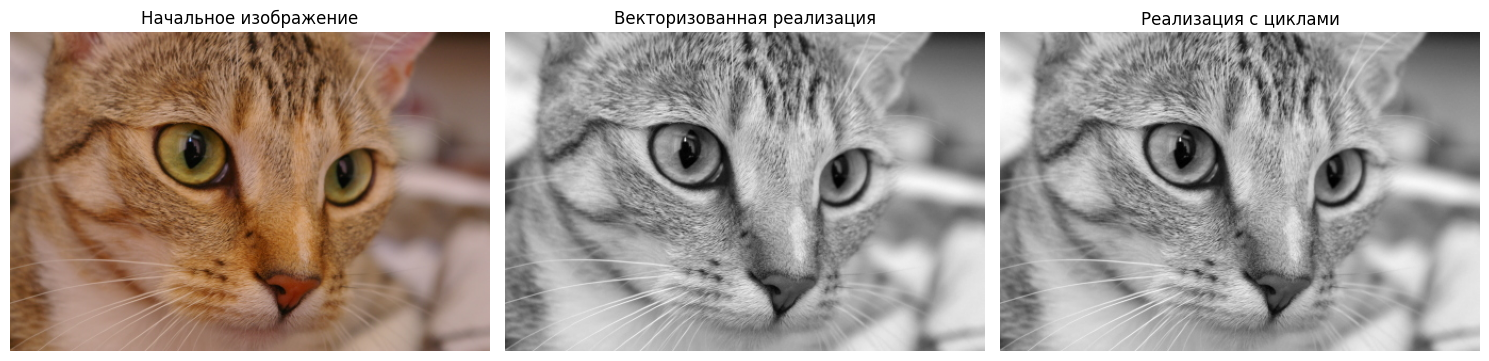

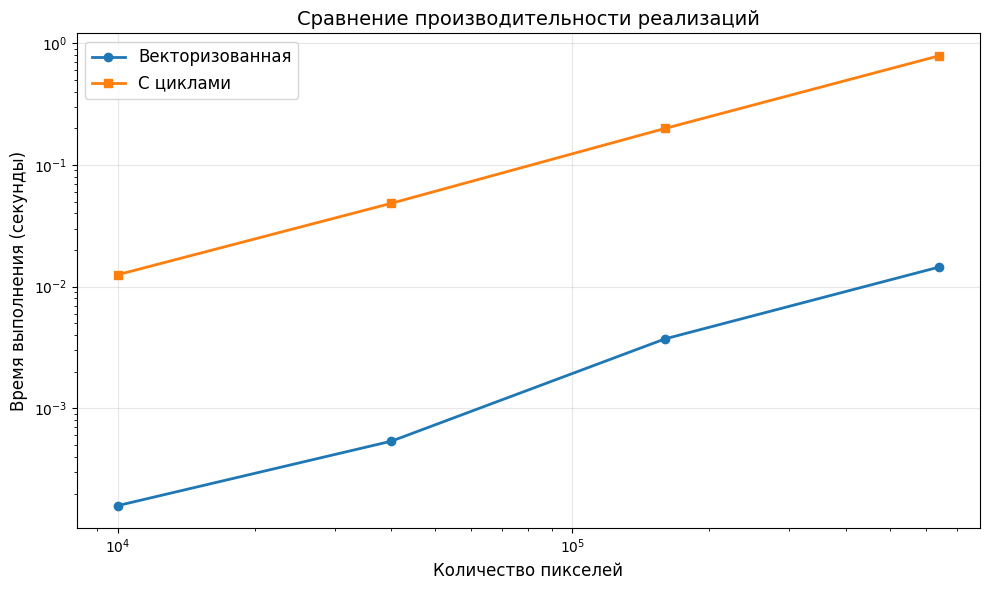

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import time

def convert_image_cyclic(image, weights):
    height, width, num_channels = image.shape
    result = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            for k in range(num_channels):
                result[i, j] += image[i, j, k] * weights[k]
    return result

def convert_image_vectorized(image, weight):
    return np.sum(image * weight, axis=2)

def measure_time(func, *args, repetitions=5):
    start_time = time.time()
    for _ in range(repetitions):
        result = func(*args)
    end_time = time.time()
    return (end_time - start_time) / repetitions, result
image = data.chelsea()
weights = np.array([0.299, 0.587, 0.114])  
time_vec, result_vec = measure_time(convert_image_vectorized, image, weights)
time_loop, result_loop = measure_time(convert_image_cyclic, image, weights)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Начальное изображение')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(result_vec, cmap='gray')
plt.title('Векторизованная реализация')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(result_loop, cmap='gray')
plt.title('Реализация с циклами')
plt.axis('off')
plt.tight_layout()
plt.show()
sizes = [(100, 100), (200, 200), (400, 400), (800, 800)]
times_vectorized = []
times_loop = []

for size in sizes:
    test_image = np.random.randint(0, 256, size + (3,), dtype=np.uint8)
    time_vec, _ = measure_time(convert_image_vectorized, test_image, weights)
    times_vectorized.append(time_vec)
    time_loop, _ = measure_time(convert_image_cyclic, test_image, weights)
    times_loop.append(time_loop)

plt.figure(figsize=(10, 6))
pixel_counts = [size[0] * size[1] for size in sizes]
plt.plot(pixel_counts, times_vectorized, 'o-', label='Векторизованная', linewidth=2, markersize=6)
plt.plot(pixel_counts, times_loop, 's-', label='С циклами', linewidth=2, markersize=6)
plt.xlabel('Количество пикселей', fontsize=12)
plt.ylabel('Время выполнения (секунды)', fontsize=12)
plt.title('Сравнение производительности реализаций', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

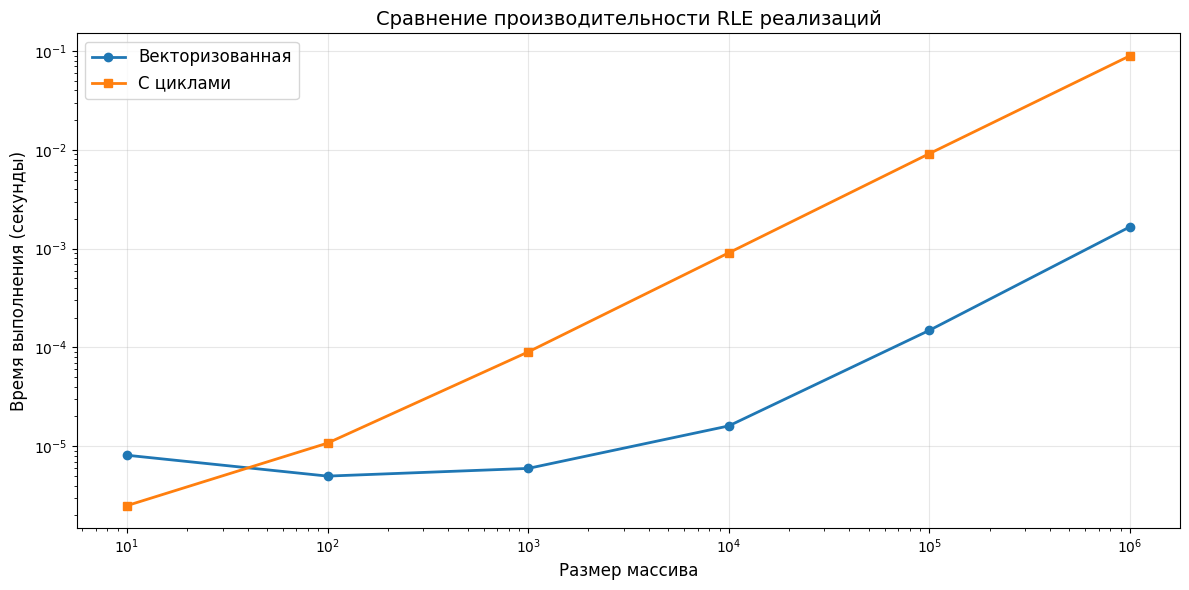

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import time

def run_length_encoding_vectorized(x):
    change_positions = np.where(x[:-1] != x[1:])[0] + 1
    indices = np.empty(len(change_positions) + 2, dtype=int)
    indices[0] = 0
    indices[1:-1] = change_positions
    indices[-1] = len(x)
    values = x[indices[:-1]]
    counts = np.diff(indices)
    return values, counts

def run_length_encoding_loop(x):
    if len(x) == 0:
        return np.array([], dtype=x.dtype), np.array([], dtype=int)
    v = []
    c = []
    cur_value = x[0]
    cur_count = 1
    for i in range(1, len(x)):
        if x[i] == cur_value:
            cur_count += 1
        else:
            v.append(cur_value)
            c.append(cur_count)
            cur_value = x[i]
            cur_count = 1
    
    c.append(cur_value)
    c.append(cur_count)
    return np.array(v), np.array(c)

def measure_time(func, x, repetitions=10):
    start_time = time.time()
    for _ in range(repetitions):
        result = func(x)
    end_time = time.time()
    return (end_time - start_time) / repetitions, result

result_vec = run_length_encoding_vectorized(x)
result_loop = run_length_encoding_loop(x)

sizes = [10, 100, 1000, 10000, 100000, 1000000]
times_vectorized = []
times_loop = []

for size in sizes:
    x = np.repeat(np.random.randint(0, 100, size//10 + 1), 
                 np.random.randint(1, 20, size//10 + 1))[:size]
    time_vec, result_vec = measure_time(run_length_encoding_vectorized, x)
    times_vectorized.append(time_vec)
    time_loop, result_loop = measure_time(run_length_encoding_loop, x)
    times_loop.append(time_loop)
plt.figure(figsize=(12, 6))

plt.plot(sizes, times_vectorized, 'o-', label='Векторизованная', linewidth=2, markersize=6)
plt.plot(sizes, times_loop, 's-', label='С циклами', linewidth=2, markersize=6)

plt.xlabel('Размер массива', fontsize=12)
plt.ylabel('Время выполнения (секунды)', fontsize=12)
plt.title('Сравнение производительности RLE реализаций', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()



 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

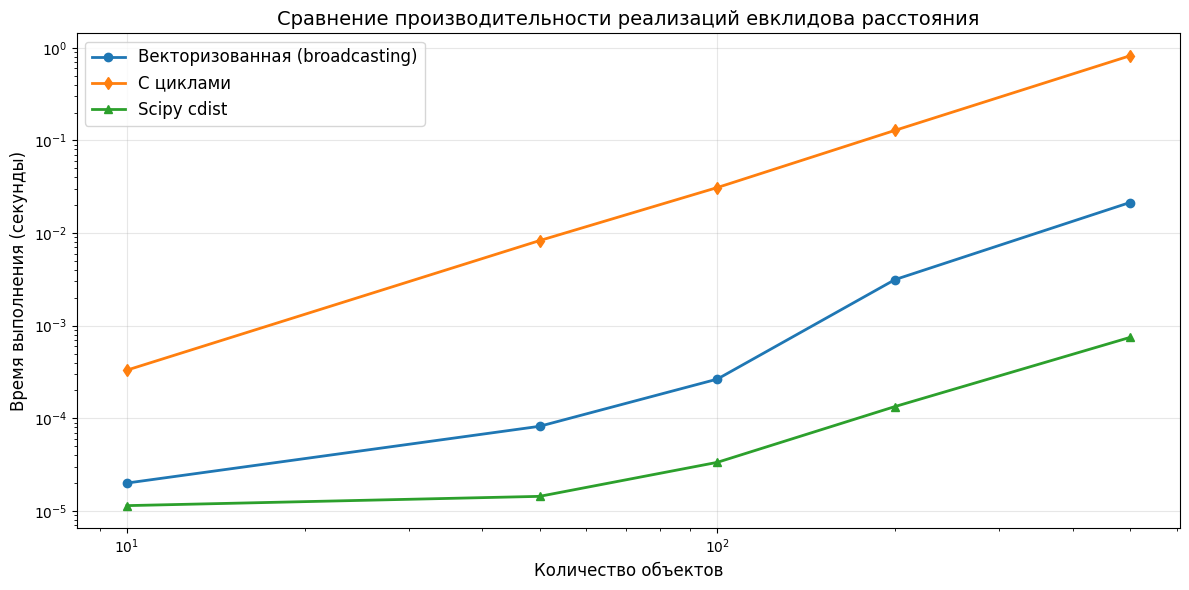

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.spatial.distance import cdist

def euclidean_dist_vectorized(X, Y):
    return np.sqrt(np.sum((X[:, np.newaxis, :] - Y[np.newaxis, :, :]) ** 2, axis=2)) # X[:, np.newaxis, :] это по сути становится (n, 1, d)

def euclidean_dist_loop(X, Y):
    n, d1 = X.shape
    m, d2 = Y.shape
    d = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            d[i, j] = np.sqrt(np.sum((X[i] - Y[j]) ** 2))
    
    return d

def measure_time(func, *args, repetitions=5):
    start_time = time.time()
    for _ in range(repetitions):
        result = func(*args)
    end_time = time.time()
    return (end_time - start_time) / repetitions, result

n_values = [10, 50, 100, 200, 500]  
d = 10 # размерность 
times_vectorized = []
times_loop = []
times_scipy = []

for n in n_values:
    X = np.random.rand(n, d)
    Y = np.random.rand(n, d)
    time_vec, result_vec = measure_time(euclidean_dist_vectorized, X, Y)
    times_vectorized.append(time_vec)
    time_loop, result_loop = measure_time(euclidean_dist_loop, X, Y)
    times_loop.append(time_loop)
    time_scipy, result_scipy = measure_time(cdist, X, Y)
    times_scipy.append(time_scipy)
    
plt.figure(figsize=(12, 6))

plt.plot(n_values, times_vectorized, 'o-', label='Векторизованная (broadcasting)', linewidth=2, markersize=6)
plt.plot(n_values, times_loop, 'd-', label='С циклами', linewidth=2, markersize=6)
plt.plot(n_values, times_scipy, '^-', label='Scipy cdist', linewidth=2, markersize=6)

plt.xlabel('Количество объектов', fontsize=12)
plt.ylabel('Время выполнения (секунды)', fontsize=12)
plt.title('Сравнение производительности реализаций евклидова расстояния', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()


### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

# Краткий отчёт о выполнении домашнего задания



## Введение

Этот бессмылсенный отчёт демонстрирует различные возможности разметки **Markdown**)

### 1. Выделение текста

В Markdown можно выделять текст *курсивом*, **полужирным**, ~~зачёркивание~~ 

### 2. Списки

#### Нумерованный список:
1. Первый
2. это второй
3. third

#### Маркированный список:
- Элемент A
- Элемент B
- Элемент C

### Блоки кода

```python
def hello_world():
    print("I am guy")
    return True
```

### 4. Цитаты

> Это пример цитаты. «Неудача — это возможность начать заново, но уже более мудро» (Генри Форд).

### 5. Таблицы

| V | S | карась |
|-----------|-----------|-----------|
| x  | y  | z  |
| y | x  | z |


